### Score: `[93]`

Q1. `[26]` good! 

Q2. `[7]` 注意处理细节。

Q3. `[47]` 请注意一些小瑕疵。

Q4. `[13]`  4.2 以及 4.3中your findings。

In [1]:
p1_path = '..\Assignment2_common_files\earthquakes.tsv'
p2_path = '..\Assignment2_common_files\Baoan_Weather_1998_2022.csv'

In [15]:
#1.1
import pandas as pd

#读取tsv文件,pandas字段之间的分隔符是制表符，其中的sep='\t'用来识别它（I got inspired by reading AI）
Sig_Eqs = pd.read_csv('earthquakes-2024-11-03_12-52-44_+0800.tsv',sep= '\t')

#确保‘Country’和‘Deaths’列是存在的
if 'Country' in Sig_Eqs.columns and 'Deaths' in Sig_Eqs.columns:
    #将‘Deaths’列的数据类型转为整数型，并将不可转为整数型的列识别为NaN，不会显示错误
    Sig_Eqs['Deaths'] = pd.to_numeric(Sig_Eqs['Deaths'], errors='coerce')
    #去掉‘Deaths’中的NaN值
    Sig_Eqs = Sig_Eqs.dropna(subset=['Deaths'])
    #按照国家和死亡人数进行分组并进行求和
    country_deaths = Sig_Eqs.groupby('Country')['Deaths'].sum()
    #获取死亡人数最多的前20个国家
    top_20_countries = country_deaths.nlargest(20)
    print(top_20_countries)
else:
    print("The required columns 'Country' and 'Deaths' are not in the file.")

Country
CHINA           2075947.0
TURKEY          1188881.0
IRAN            1011453.0
ITALY            498418.0
SYRIA            439224.0
HAITI            323478.0
AZERBAIJAN       317219.0
JAPAN            279607.0
ARMENIA          191890.0
PAKISTAN         145083.0
IRAQ             136200.0
ECUADOR          135496.0
TURKMENISTAN     117412.0
PERU             102169.0
ISRAEL            90388.0
PORTUGAL          83572.0
GREECE            80378.0
CHILE             64277.0
INDIA             63507.0
TAIWAN            57153.0
Name: Deaths, dtype: float64


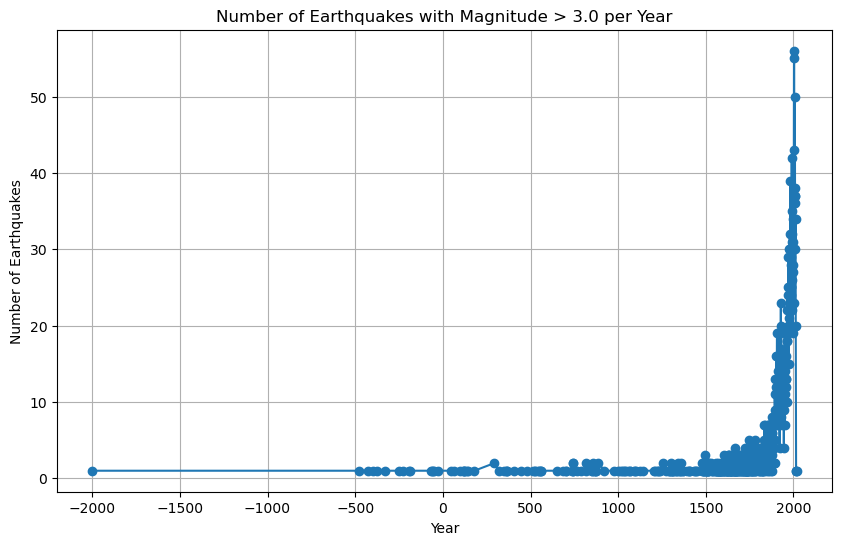

In [3]:
#1.2
import pandas as pd
import matplotlib.pyplot as plt

# 读取TSV文件
Sig_Eqs = pd.read_csv('earthquakes-2024-11-03_12-52-44_+0800.tsv', sep='\t')

# 确保'Year'和'Ms'列是存在的
if 'Year' in Sig_Eqs.columns and 'Ms' in Sig_Eqs.columns:
    # 将'Ms'列的数据类型转为浮点型
    Sig_Eqs['Ms'] = pd.to_numeric(Sig_Eqs['Ms'], errors='coerce')
    # 去掉'Ms'中的NaN值
    Sig_Eqs = Sig_Eqs.dropna(subset=['Ms'])
    # 筛选震级大于3.0的地震
    Sig_Eqs = Sig_Eqs[Sig_Eqs['Ms'] > 3.0]
    # 按照年份进行分组并计数
    yearly_counts = Sig_Eqs.groupby('Year')['Ms'].count()
    # 绘制时间序列图
    plt.figure(figsize=(10, 6))
    plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
    plt.title('Number of Earthquakes with Magnitude > 3.0 per Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Earthquakes')
    plt.grid(True)
    plt.show()
else:
    print("The required columns 'Year' and 'Ms' are not in the file.")

In [ ]:
#1.3
import pandas as pd

# 定义该函数
def CountEq_LargestEq(data, country):
    # 选择特定国家的地震数据
    country_data = data[data['Country'] == country]
    # 计算地震的总数
    total_eq = len(country_data)
    
    # 初始化最大地震信息变量（I got inspired by reading AI）
    largest_eq_latitude = None
    largest_eq_longitude = None
    largest_eq_year = None
    largest_eq_mo = None
    largest_eq_dy = None
    largest_eq_hr = None
    largest_eq_mn = None
    largest_eq_sec = None

    # 找出最大的地震
    if total_eq > 0:
        # 从country_data中找出Ms列，在计算出Ms的最大值，利用布尔索引将Ms中的每个值与最大值进行比较
        largest_eq = country_data[country_data['Ms'] == country_data['Ms'].max()]
        # 得到最大震级的地点以及日期,iloc[0]是一种索引，从第一行开始（I got inspired by reading AI）
        if not largest_eq.empty:
            largest_eq_latitude = largest_eq['Latitude'].iloc[0]
            largest_eq_longitude = largest_eq['Longitude'].iloc[0]
            # 得到最大地震的时间信息
            largest_eq_year = largest_eq['Year'].iloc[0]
            largest_eq_mo = largest_eq['Mo'].iloc[0]
            largest_eq_dy = largest_eq['Dy'].iloc[0]
            largest_eq_hr = largest_eq['Hr'].iloc[0]
            largest_eq_mn = largest_eq['Mn'].iloc[0]
            largest_eq_sec = largest_eq['Sec'].iloc[0]

    # 返回地震总数和最大地震的时间和地点信息
    return total_eq, (largest_eq_year, largest_eq_mo, largest_eq_dy, largest_eq_hr, largest_eq_mn, largest_eq_sec), (largest_eq_latitude, largest_eq_longitude)

# 读取TSV文件
Sig_Eqs = pd.read_csv('earthquakes-2024-11-03_12-52-44_+0800.tsv', sep='\t')

# 确保必要的列存在
if ('Country' in Sig_Eqs.columns and 
    'Ms' in Sig_Eqs.columns and 
    'Latitude' in Sig_Eqs.columns and 
    'Longitude' in Sig_Eqs.columns and 
    'Year' in Sig_Eqs.columns and 
    'Mo' in Sig_Eqs.columns and 
    'Dy' in Sig_Eqs.columns and 
    'Hr' in Sig_Eqs.columns and 
    'Mn' in Sig_Eqs.columns and 
    'Sec' in Sig_Eqs.columns):
    # 得到所有国家的列表，并保证没有重复的
    countries = Sig_Eqs['Country'].unique()
    results = []
    for country in countries:
        result = CountEq_LargestEq(Sig_Eqs, country)
        results.append(result)
    
    # 结构化数据，DataFrame可以提供丰富的功能来处理数据，比如排序（I got inspired by reading AI）
    results_df = pd.DataFrame(results, columns=['Total Earthquakes', 'Largest Earthquake Time', 'Largest Earthquake Location'])
    # 进行分类，按照表中的Total Earthquakes进行分类，其中ascending=False表示降序排列
    sorted_results_df = results_df.sort_values(by='Total Earthquakes', ascending=False)
    # 打印结果
    print(sorted_results_df)
else:
    print("The required columns are not in the file.")

     Total Earthquakes                 Largest Earthquake Time  \
15                 623   (1920.0, 12.0, 16.0, 12.0, 5.0, 54.7)   
34                 419       (869.0, 7.0, 13.0, nan, nan, nan)   
71                 412   (2004.0, 12.0, 26.0, 0.0, 58.0, 53.5)   
8                  386      (856.0, 12.0, 22.0, nan, nan, nan)   
10                 337  (1939.0, 12.0, 26.0, 23.0, 57.0, 23.8)   
..                 ...                                     ...   
120                  1    (None, None, None, None, None, None)   
126                  1   (1914.0, 10.0, 23.0, 6.0, 18.0, 34.0)   
128                  1    (None, None, None, None, None, None)   
135                  1   (1963.0, 2.0, 21.0, 17.0, 14.0, 31.0)   
0                    0    (None, None, None, None, None, None)   

    Largest Earthquake Location  
15            (36.601, 105.317)  
34                (38.5, 143.8)  
71              (3.295, 95.982)  
8                  (36.2, 54.3)  
10             (39.907, 39.586)  
.. 

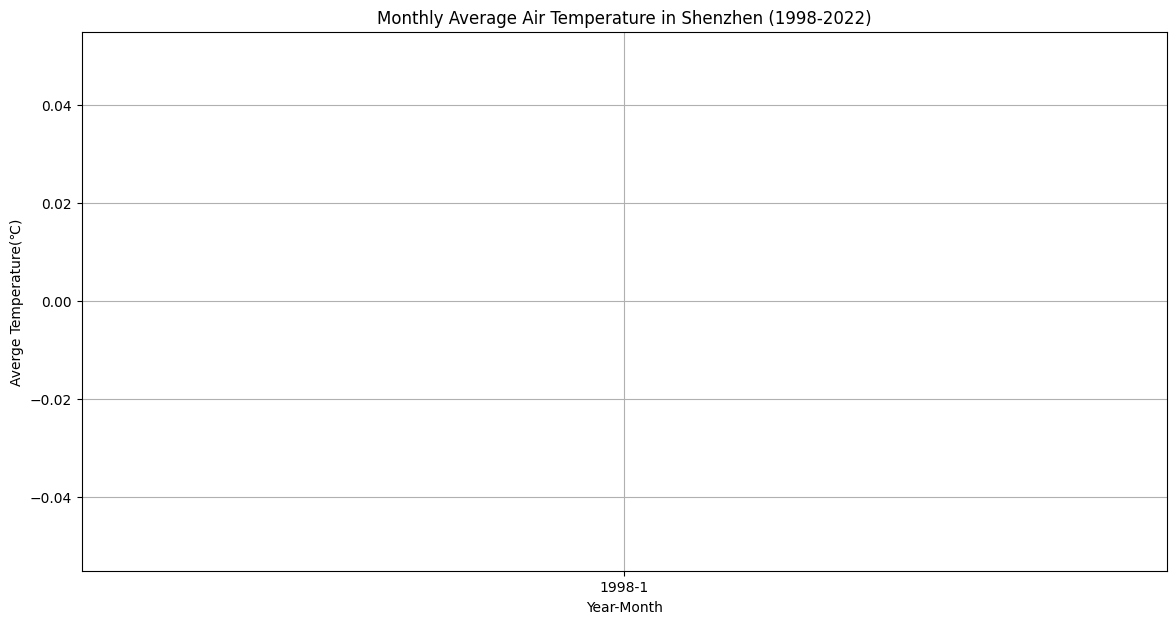

In [3]:
#2
import pandas as pd
import matplotlib.pyplot as plt
#读取CSV文件
weather_data = pd.read_csv(p2_path,low_memory=False)
#确保必要列的存在
if 'TMP' in weather_data.columns:
    # 将'TMP'列转换为数值类型，无法转换的值将变为NaN
    weather_data['TMP'] = pd.to_numeric(weather_data['TMP'], errors='coerce')
#根据指南中的气温缩放因子为10，所以将气温TMP值除10
    weather_data['TMP'] = weather_data['TMP']/10
    #去除错误值,其中的weather_data['TMP'] != 9999是一个布尔条件，用于筛选数据，检查TMP值是否不等于9999（I got inspired by reading AI）
    weather_data = weather_data[weather_data['TMP'] != 9999]
    #找到日期列，转为datatime的类型,并将日期列提取出年与月
    if 'DATE'in weather_data.columns:
        weather_data['DATE'] = pd.to_datetime(weather_data['DATE'])
        weather_data['Year'] = weather_data['DATE'].dt.year
        weather_data['Month'] = weather_data['DATE'].dt.month
        #计算月平均气温,将weather_data按照'Year','Month'列进行分组，对['TMP']进行操作，分别计算每个年月的组合的TMP的平均值。
        #使用.reset_index()后，我们得到一个新的DataFrame，其中包含原始的分组键（'Year'和'Month'）以及计算出的平均值。（I got inspired by reading AI）
        monthly_avg_tmp = weather_data.groupby(['Year','Month'])['TMP'].mean().reset_index()
        #绘制月平均气温图
        plt.figure(figsize = (14,7))
        plt.plot(monthly_avg_tmp['Year'].astype(str) + '-' + monthly_avg_tmp['Month'].astype(str),monthly_avg_tmp['TMP'],marker='o')
        plt.title('Monthly Average Air Temperature in Shenzhen (1998-2022)')
        plt.xlabel('Year-Month')
        plt.ylabel('Averge Temperature(℃)')
        plt.grid(True)
        plt.show()

In [ ]:
weather_data # BUG: weather_data中TMP全是NaN，请在看一看数据说明TMP列的形式, 应该先分离 '，' 再转num

,STATION,DATE,SOURCE,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,AA1,AA2,AA3,AG1,...,SLP,SOURCE.1,TMP,UA1,UG1,VIS,WG1,WND,Year,Month
0,59493099999,1998-01-01 00:00:00,4,SY-MT,ZGSZ,V020,"06,0000,9,1",NaN,NaN,"0,000",...,"10184,1",4,NaN,NaN,NaN,"008000,1,N,1",NaN,"040,1,N,0040,1",1998,1
1,59493099999,1998-01-01 01:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,"0,999",...,"99999,9",4,NaN,NaN,NaN,"003300,1,N,1",NaN,"130,1,N,0020,1",1998,1
2,59493099999,1998-01-01 02:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,"0,999",...,"99999,9",4,NaN,NaN,NaN,"003500,1,N,1",NaN,"110,1,N,0020,1",1998,1
3,59493099999,1998-01-01 03:00:00,4,SY-MT,ZGSZ,V020,NaN,NaN,NaN,"0,000",...,"10185,1",4,NaN,NaN,NaN,"011000,1,N,1",NaN,"090,1,N,0020,1",1998,1
4,59493099999,1998-01-01 04:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,"0,999",...,"99999,9",4,NaN,NaN,NaN,"005000,1,N,1",NaN,"270,1,N,0030,1",1998,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235669,59493099999,2022-10-10 20:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,"99999,9",4,NaN,NaN,NaN,"009900,5,9,9",NaN,"030,1,N,0060,1",2022,10
235670,59493099999,2022-10-10 21:00:00,4,FM-12,99999,V020,"06,0000,9,1","12,0000,9,1","24,0000,9,1",NaN,...,"10177,1",4,NaN,NaN,NaN,"030000,1,9,9",NaN,"020,1,N,0030,1",2022,10
235671,59493099999,2022-10-10 21:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,"99999,9",4,NaN,NaN,NaN,"009900,5,9,9",NaN,"020,1,N,0040,1",2022,10
235672,59493099999,2022-10-10 22:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,"99999,9",4,NaN,NaN,NaN,"009900,5,9,9",NaN,"020,1,V,0060,1",2022,10


In [ ]:
#3.1
import pandas as pd
#读取CSV文件
ibtracs_data = pd.read_csv(f"..\Assignment2_common_files\ibtracs.ALL.list.v04r00.csv")
#确保列的存在
if 'WMO_WIND' in ibtracs_data.columns and 'NAME' in ibtracs_data.columns and 'SID' in ibtracs_data.columns:
    #将风速转为数值类型
    ibtracs_data['WMO_WIND'] = pd.to_numeric(ibtracs_data['WMO_WIND'],errors='coerce')
    #去除NaN值
    ibtracs_data = ibtracs_data.dropna(subset=['WMO_WIND'])
    #根据SID进行分组，并计算最大风速
    max_wind_speeds = ibtracs_data.groupby('SID')['WMO_WIND'].max().reset_index()
    #根据最大风速进行降序排列，并获得排序前10的飓风
    top_10_hurricanes = max_wind_speeds.nlargest(10,'WMO_WIND')
    #合并NAME列（I got inspired by reading AI）
    top_10_hurricanes = top_10_hurricanes.merge(ibtracs_data[['SID','NAME']],on='SID',how='inner') 
    #  NOTE: merge 操作导致重复项，现在是 459 rows
    #排序
    top_10_hurricanes = top_10_hurricanes.sort_values(by='WMO_WIND', ascending=False)
    print(top_10_hurricanes[['NAME','WMO_WIND']])
else:
     print("The required columns 'WMO_WIND', 'NAME', or 'SID' are not in the file.")

C:\Users\w\AppData\Local\Temp\ipykernel_33544\190705999.py:5: DtypeWarning: Columns (1,2,8,9,14,19,20,161,162) have mixed types. Specify dtype option on import or set low_memory=False.
  ibtracs_data = pd.read_csv(f"..\Assignment2_common_files\ibtracs.ALL.list.v04r00.csv")


         NAME  WMO_WIND
18   PATRICIA     185.0
17   PATRICIA     185.0
16   PATRICIA     185.0
15   PATRICIA     185.0
14   PATRICIA     185.0
..        ...       ...
454      RICK     155.0
455      RICK     155.0
456      RICK     155.0
457      RICK     155.0
458      RICK     155.0

[459 rows x 2 columns]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3368\2954675171.py:5: DtypeWarning: Columns (1,2,8,9,14,19,20,161,162) have mixed types. Specify dtype option on import or set low_memory=False.
  ibtracs_data = pd.read_csv('ibtracs.ALL.list.v04r00.csv')


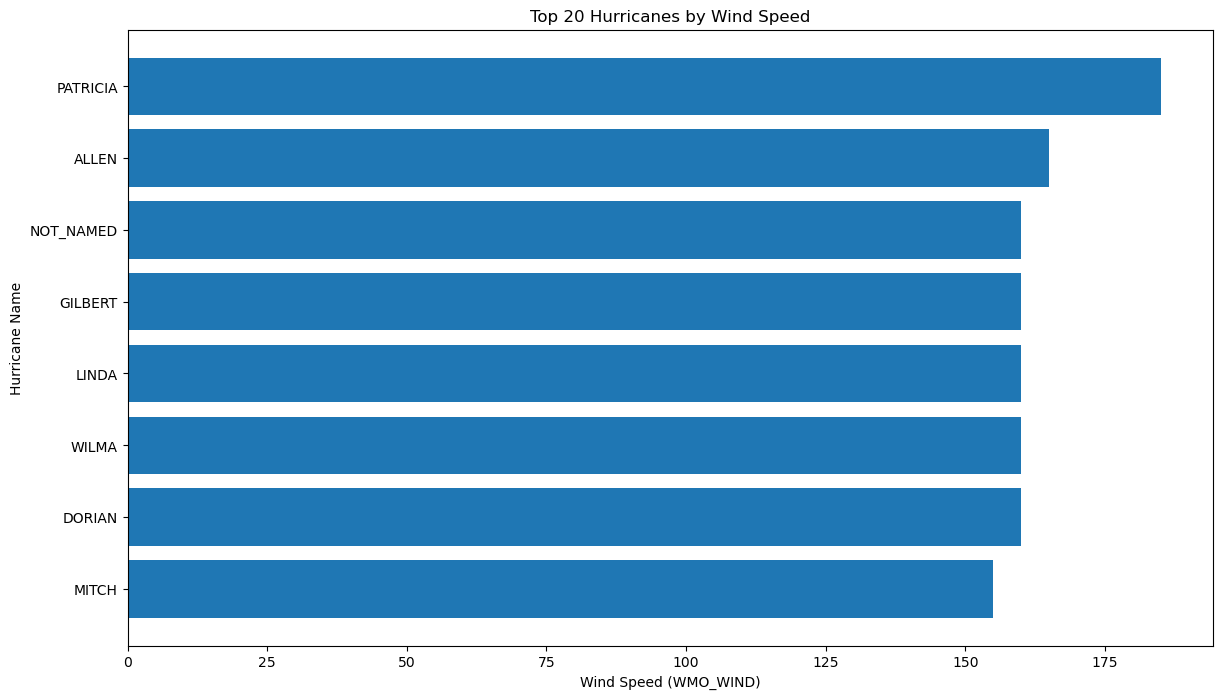

In [ ]:
#3.2
# BUG here
import pandas as pd
import matplotlib.pyplot as plt
#读取CSV文件
ibtracs_data = pd.read_csv('ibtracs.ALL.list.v04r00.csv')
if 'WMO_WIND' in ibtracs_data.columns:
    ibtracs_data['WMO_WIND'] = pd.to_numeric(ibtracs_data['WMO_WIND'],errors='coerce')
    ibtracs_data = ibtracs_data.dropna(subset=['WMO_WIND'])
    # NOTE: 没有group by使得数据出现覆盖情况，图像做出来并不是20行
    top_20_hurricanes = ibtracs_data.nlargest(20,'WMO_WIND')
    plt.figure(figsize=(14, 8))
     # 假设NAME列存在且包含飓风名称
    plt.barh(top_20_hurricanes['NAME'], top_20_hurricanes['WMO_WIND']) 
    plt.xlabel('Wind Speed (WMO_WIND)')
    plt.ylabel('Hurricane Name')
    plt.title('Top 20 Hurricanes by Wind Speed')
    # 颠倒y轴顺序，使得最大的飓风在图表顶部
    plt.gca().invert_yaxis()  
    plt.show()
else:
    print("The 'WMO_WIND' column is not in the file.")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3368\2302711234.py:5: DtypeWarning: Columns (1,2,8,9,14,19,20,161,162) have mixed types. Specify dtype option on import or set low_memory=False.
  ibtracs_data = pd.read_csv('ibtracs.ALL.list.v04r00.csv')


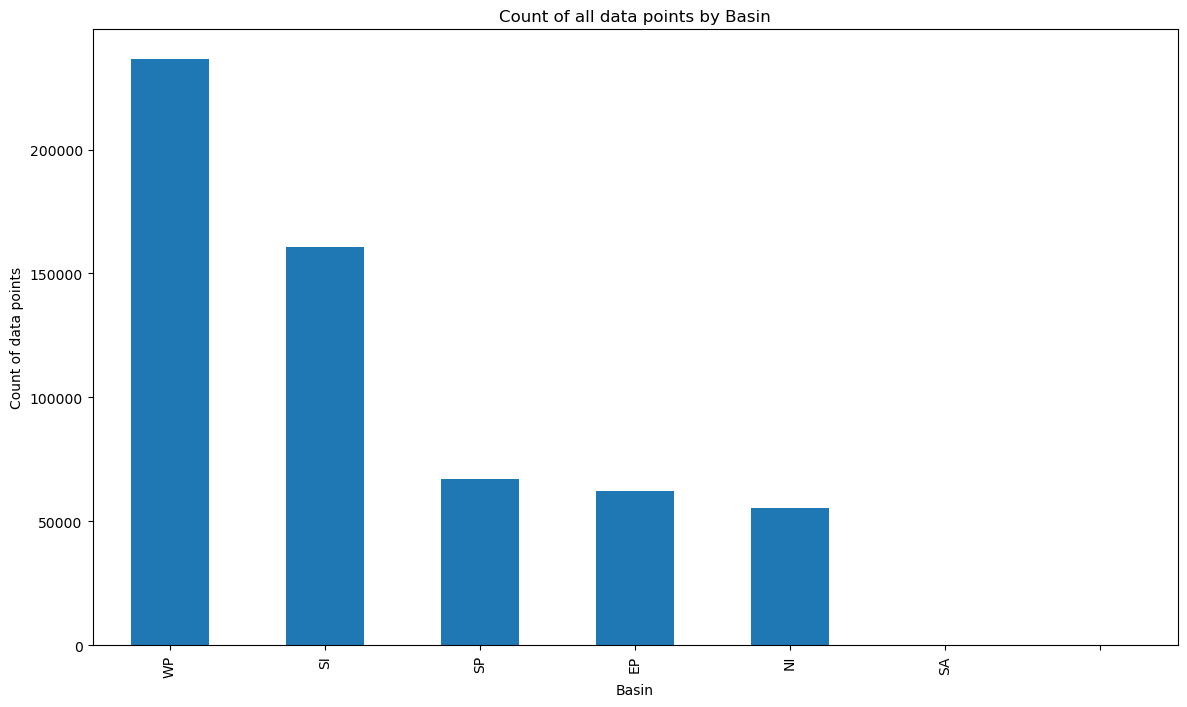

In [ ]:
#3.3
import pandas as pd
import matplotlib.pyplot as plt
# NOTE: 没有dropna 导致 basin_counts 会多一列NaN
#读取CSV文件
ibtracs_data = pd.read_csv('ibtracs.ALL.list.v04r00.csv')
if 'BASIN' in ibtracs_data.columns:
    basin_counts = ibtracs_data['BASIN'].value_counts()
    #绘制条形图
    plt.figure(figsize=(14,8))
    basin_counts.plot(kind='bar')
    plt.xlabel('Basin')
    plt.ylabel('Count of data points')
    plt.title('Count of all data points by Basin')
    plt.show()
else:
    print("The 'BASIN' column is not in the file.")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3368\555382750.py:5: DtypeWarning: Columns (1,2,8,9,14,19,20,161,162) have mixed types. Specify dtype option on import or set low_memory=False.
  ibtracs_data = pd.read_csv('ibtracs.ALL.list.v04r00.csv')


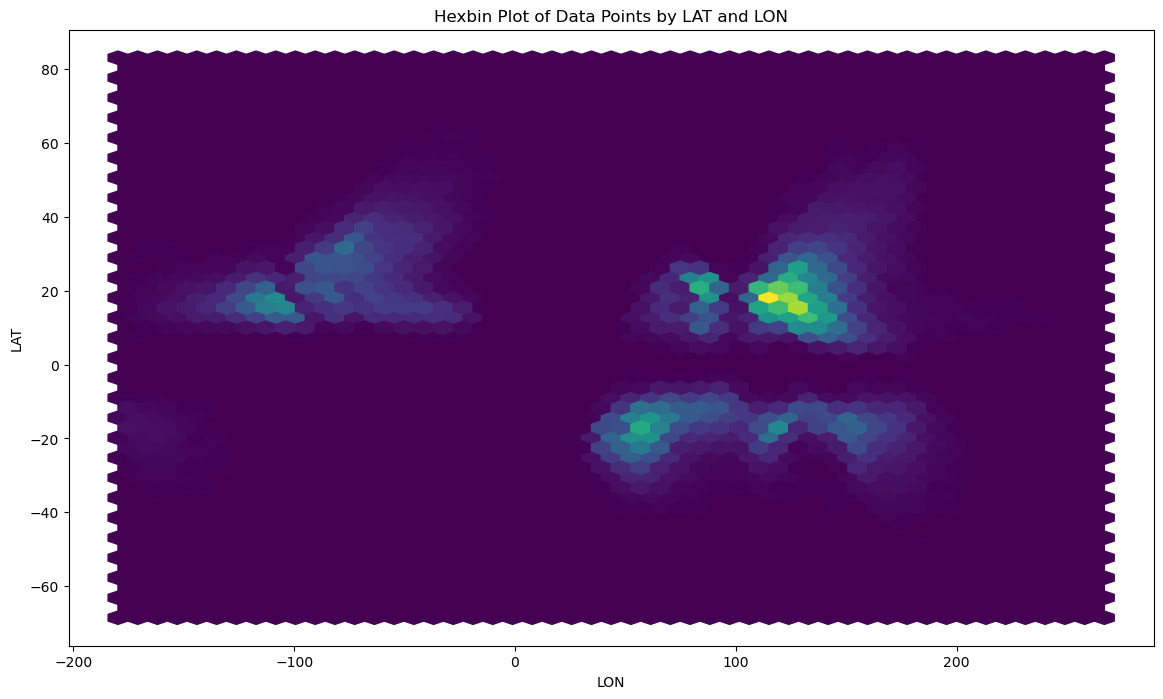

In [76]:
#3.4
import pandas as pd
import matplotlib.pyplot as plt
#读取CSV文件
ibtracs_data = pd.read_csv('ibtracs.ALL.list.v04r00.csv')
if 'LAT'in ibtracs_data.columns and 'LON'in ibtracs_data.columns:
    ibtracs_data['LAT'] = pd.to_numeric(ibtracs_data['LAT'],errors='coerce')
    ibtracs_data['LON'] = pd.to_numeric(ibtracs_data['LON'],errors='coerce')
    ibtracs_data = ibtracs_data.dropna(subset=['LAT','LON'])
    #绘制六边形分箱图
    plt.figure(figsize=(14,8))
    #用matplotlib库中的恶hexbin函数来创建一个六边形分箱图（hexbin plot）（I got inspired by reading AI）
    #gridsize为网格数量，cmap='viridis'是用来规定颜色映射的，其中viridis是一种从黄到蓝的映射。（I got inspired by reading AI）
    hb = plt.hexbin(ibtracs_data['LON'],ibtracs_data['LAT'],gridsize=50,cmap='viridis')
    plt.xlabel('LON')
    plt.ylabel('LAT')
    plt.title('Hexbin Plot of Data Points by LAT and LON')
    plt.show()
else:
    print("The 'LAT' or 'LON' column is not in the file.")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3368\2113376908.py:5: DtypeWarning: Columns (1,2,8,9,14,19,20,161,162) have mixed types. Specify dtype option on import or set low_memory=False.
  ibtracs_data = pd.read_csv('ibtracs.ALL.list.v04r00.csv')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3368\2113376908.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mangkhut_data['LAT'] = pd.to_numeric(mangkhut_data['LAT'], errors='coerce')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3368\2113376908.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

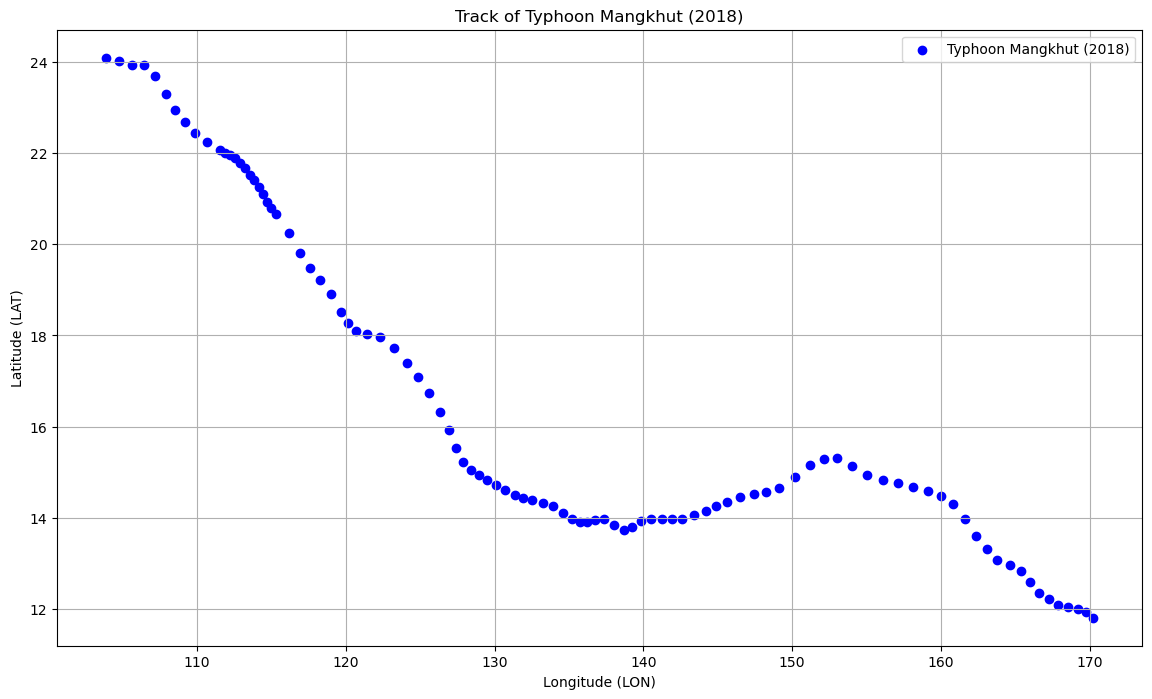

In [91]:
#3.5
import pandas as pd
import matplotlib.pyplot as plt
# 加载CSV文件到pandas DataFrame
ibtracs_data = pd.read_csv('ibtracs.ALL.list.v04r00.csv')
if 'NAME' in ibtracs_data.columns and 'LAT' in ibtracs_data.columns and 'LON' in ibtracs_data.columns:
    #选出山竹的数据
    mangkhut_data = ibtracs_data[(ibtracs_data['SEASON'] == 2018) & (ibtracs_data['NAME'] == 'MANGKHUT')]
    
    # 将纬度和经度转换为数值类型
    mangkhut_data['LAT'] = pd.to_numeric(mangkhut_data['LAT'], errors='coerce')
    mangkhut_data['LON'] = pd.to_numeric(mangkhut_data['LON'], errors='coerce')
    
    # 去除纬度和经度中的NaN值
    mangkhut_data = mangkhut_data.dropna(subset=['LAT', 'LON'])

    # 绘制散点图
    plt.figure(figsize=(14, 8))
    plt.scatter(mangkhut_data['LON'], mangkhut_data['LAT'], marker='o', color='blue', label='Typhoon Mangkhut (2018)')
    plt.xlabel('Longitude (LON)')
    plt.ylabel('Latitude (LAT)')
    plt.title('Track of Typhoon Mangkhut (2018)')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("The 'NAME', 'LAT', or 'LON' column is not in the file.")

In [9]:
#3.6
import pandas as pd
ibtracs_data = pd.read_csv(f"..\Assignment2_common_files\ibtracs.ALL.list.v04r00.csv", low_memory=False)
if 'BASIN' in ibtracs_data.columns and 'SEASON' in ibtracs_data.columns:
    ibtracs_data['SEASON'] = pd.to_numeric(ibtracs_data['SEASON'], errors='coerce')
    # 去除'SEASON'列中的NaN值
    ibtracs_data = ibtracs_data.dropna(subset=['SEASON'])
    #只包含1970年之后的数据
    filtered_data = ibtracs_data[(ibtracs_data['SEASON'] >= 1970)]
    #只包含WP和EP部分的数据
    filtered_data = filtered_data[filtered_data['BASIN'].isin(['WP', 'EP'])]
    print(filtered_data)
else:
    print("The 'BASIN' or 'SEASON' column is not in the file.")

                  SID  SEASON NUMBER BASIN SUBBASIN       NAME  \
350395  1970050N07151  1970.0     22    WP       MM      NANCY   
350396  1970050N07151  1970.0     22    WP       MM      NANCY   
350397  1970050N07151  1970.0     22    WP       MM      NANCY   
350398  1970050N07151  1970.0     22    WP       MM      NANCY   
350399  1970050N07151  1970.0     22    WP       MM      NANCY   
...               ...     ...    ...   ...      ...        ...   
707086  2022275N10316  2022.0     76    EP       MM      JULIA   
707087  2022275N10316  2022.0     76    EP       MM      JULIA   
707175  2022286N15151  2022.0     80    WP       MM  NOT_NAMED   
707176  2022286N15151  2022.0     80    WP       MM  NOT_NAMED   
707177  2022286N15151  2022.0     80    WP       MM  NOT_NAMED   

                   ISO_TIME NATURE      LAT       LON  ... BOM_GUST_PER  \
350395  1970-02-19 00:00:00     TS  7.00000   151.400  ...                
350396  1970-02-19 03:00:00     TS  7.24752   151.205  ..

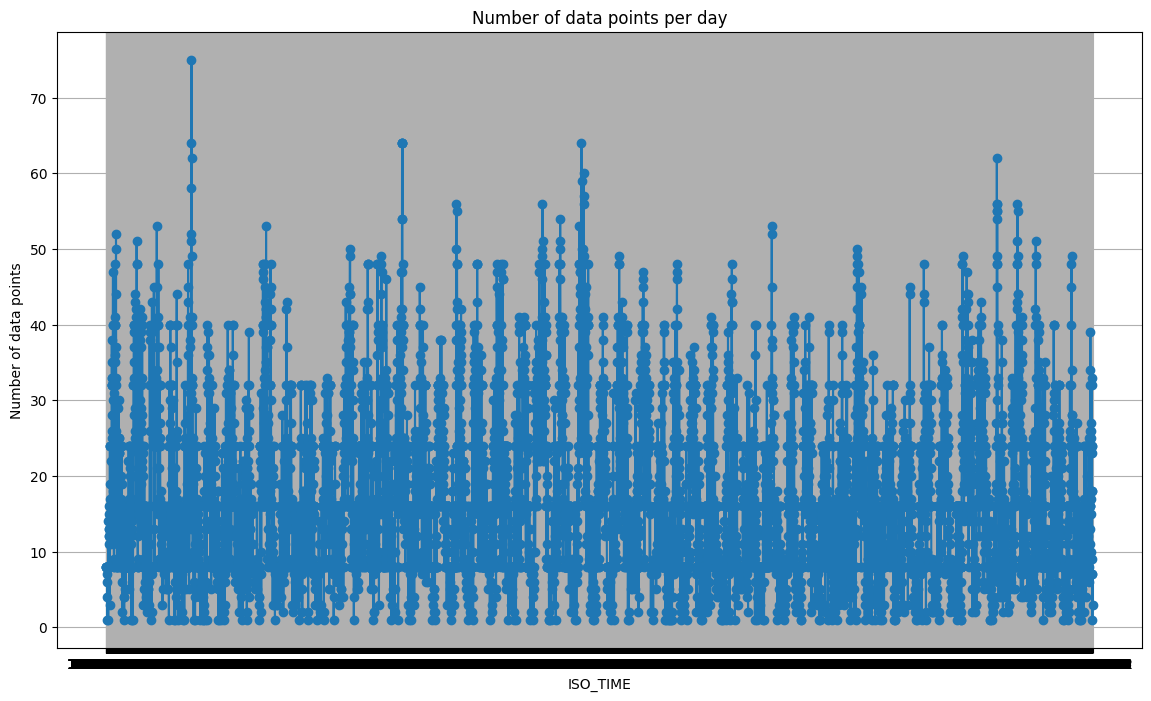

In [ ]:
#3.7
# NOTE: x轴打印每一天信息导致全黑
import pandas as pd
import matplotlib.pyplot as plt
if 'ISO_TIME' in filtered_data.columns:
    filtered_data['ISO_TIME'] = pd.to_datetime(filtered_data['ISO_TIME'])
    
    filtered_data['Year'] =  filtered_data['ISO_TIME'].dt.year
    filtered_data['Month'] =  filtered_data['ISO_TIME'].dt.month
    filtered_data['Day'] =  filtered_data['ISO_TIME'].dt.day
    #计算每天的数据点数量
    daily_counts = filtered_data.groupby(['Year','Month','Day']).size().reset_index(name='Counts')
    #绘图
    plt.figure(figsize=(14, 8))
    plt.plot(daily_counts['Year'].astype(str) + '-' + daily_counts['Month'].fillna(0).astype(str).str.zfill(2) + '-' + daily_counts['Day'].fillna(0).astype(str).str.zfill(2), daily_counts['Counts'], marker='o', linestyle='-')
    plt.title('Number of data points per day')
    plt.xlabel('ISO_TIME')
    plt.ylabel('Number of data points')
    plt.grid(True)
    plt.show()
else:
    print("The 'ISO_TIME' column is not in the file.")

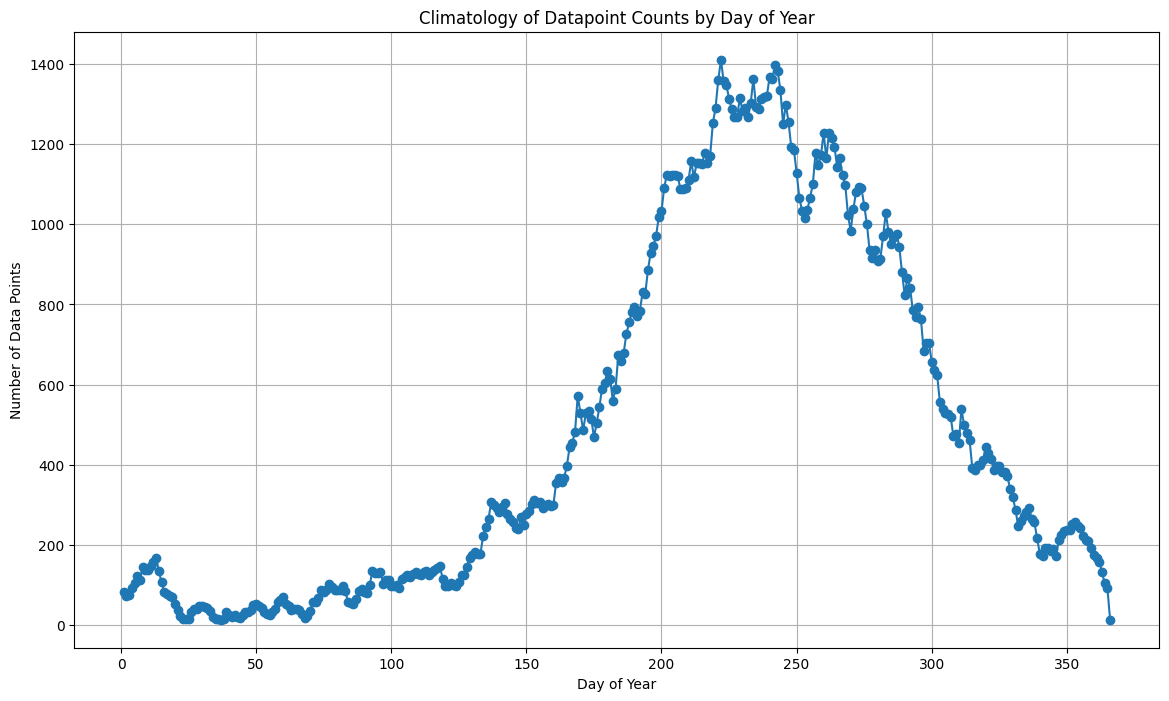

In [11]:
#3.8
import pandas as pd
import matplotlib.pyplot as plt
if 'ISO_TIME' in filtered_data.columns:
    filtered_data['ISO_TIME'] = pd.to_datetime(filtered_data['ISO_TIME'])
    filtered_data['Year'] = filtered_data['ISO_TIME'].dt.year
    filtered_data['DayOfYear'] = filtered_data['ISO_TIME'].dt.dayofyear
    #计算每年每天数据点的数量
    day_of_year_counts = filtered_data.groupby('DayOfYear').size().reset_index(name='Counts')
    #绘图
    plt.figure(figsize=(14, 8))
    plt.plot(day_of_year_counts['DayOfYear'], day_of_year_counts['Counts'], marker='o', linestyle='-')
    plt.title('Climatology of Datapoint Counts by Day of Year')
    plt.xlabel('Day of Year')
    plt.ylabel('Number of Data Points')
    plt.grid(True)
    plt.show()
else:
    print("The 'ISO_TIME' column is not in the file.")

In [ ]:
#3.9
import pandas as pd
if 'ISO_TIME' in filtered_data.columns:
    filtered_data['ISO_TIME'] = pd.to_datetime(filtered_data['ISO_TIME'])
    filtered_data['Year'] = filtered_data['ISO_TIME'].dt.year
    filtered_data['DayOfYear'] = filtered_data['ISO_TIME'].dt.dayofyear
    day_of_year_counts = filtered_data.groupby(['Year', 'DayOfYear']).size().reset_index(name='Counts')
#计算平均气候值
    climatology = day_of_year_counts.groupby('DayOfYear').mean().reset_index()
#计算异常值
    day_of_year_counts = day_of_year_counts.merge(climatology, on='DayOfYear', suffixes=('', '_climatology'))
    day_of_year_counts['Anomaly'] = day_of_year_counts['Counts'] - day_of_year_counts['Counts_climatology']
    print(day_of_year_counts[['DayOfYear', 'Anomaly']])

       DayOfYear    Anomaly
0             50   1.500000
1             51   0.000000
2             52   0.833333
3             53   1.400000
4             54   2.600000
...          ...        ...
10812        277  -8.980769
10813        278 -11.693878
10814        282 -17.301887
10815        283 -12.769231
10816        285 -15.269231

[10817 rows x 2 columns]


DatetimeIndex(['1970-12-31', '1971-12-31', '1972-12-31', '1973-12-31',
               '1974-12-31', '1975-12-31', '1976-12-31', '1977-12-31',
               '1978-12-31', '1979-12-31', '1980-12-31', '1981-12-31',
               '1982-12-31', '1983-12-31', '1984-12-31', '1985-12-31',
               '1986-12-31', '1987-12-31', '1988-12-31', '1989-12-31',
               '1990-12-31', '1991-12-31', '1992-12-31', '1993-12-31',
               '1994-12-31', '1995-12-31', '1996-12-31', '1997-12-31',
               '1998-12-31', '1999-12-31', '2000-12-31', '2001-12-31',
               '2002-12-31', '2003-12-31', '2004-12-31', '2005-12-31',
               '2006-12-31', '2007-12-31', '2008-12-31', '2009-12-31',
               '2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31',
               '2014-12-31', '2015-12-31', '2016-12-31', '2017-12-31',
               '2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31',
               '2022-12-31'],
              dtype='datetime64[ns]', name='Yea

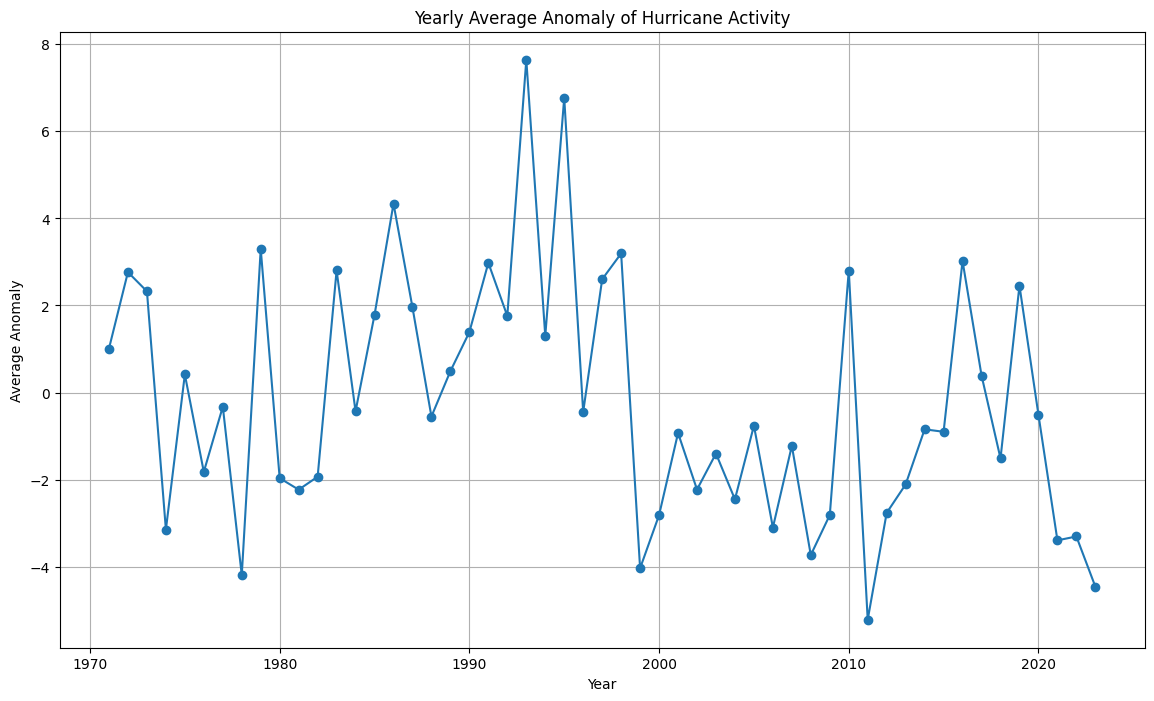

In [13]:
#3.10
import pandas as pd
import matplotlib.pyplot as plt
if 'Year' in day_of_year_counts.columns and 'Anomaly' in day_of_year_counts.columns:
    # 按照年份对异常值进行分组并计算每年的平均异常值
    yearly_anomaly = day_of_year_counts.groupby('Year')['Anomaly'].mean().reset_index()

    # 将年份转换为datetime类型，以便进行重采样（I got inspired by reading AI）
    yearly_anomaly['Year'] = pd.to_datetime(yearly_anomaly['Year'], format='%Y')

    # 设置年份为索引，并使用'YE'频率进行年度重采样（I got inspired by reading AI）
    yearly_anomaly.set_index('Year', inplace=True)
    yearly_anomaly = yearly_anomaly.resample('YE').mean()
    print(yearly_anomaly.index)
    # 绘制每年平均异常值的图表
    plt.figure(figsize=(14, 8))
    plt.plot(yearly_anomaly.index, yearly_anomaly['Anomaly'], marker='o', linestyle='-')
    plt.title('Yearly Average Anomaly of Hurricane Activity')
    plt.xlabel('Year')
    plt.ylabel('Average Anomaly')
    plt.grid(True)
    plt.show()
else:
    print("The 'Year' or 'Anomaly' column is not in the file.")

In [14]:
#4
import pandas as pd

# 加载文件
def load_and_clean(file_path):
    # 根据文件扩展名选择加载方式
    if file_path.endswith('.csv'):
        data = pd.read_csv(file_path)
    elif file_path.endswith('.xls') or file_path.endswith('.xlsx'):
        data = pd.read_excel(file_path)
    else:
        raise ValueError("Unsupported file format. Please use .csv, .xls, or .xlsx files.")
    
    # 清理缺失值
    # 这里我们选择删除包含缺失值的行，但根据需要，您也可以选择填充它们
    data.dropna(inplace=True)
    
    # 清理质量不佳的数据点
    # 假设质量不佳的数据点由特定标记表示，例如-99.900
    # 这里我们选择删除这些数据点，但您也可以选择其他处理方式
    if -99.900 in data.values:
        data = data[data.ne(-99.900).all(axis=1)]
    
    # 返回清理后的数据
    return data

# 使用函数
file_path = 'AGAGE-GCMD_CGO_ccl4.xlsx'  # 替换为你的文件路径
cleaned_data = load_and_clean(file_path)

# 打印清理后的数据
print(cleaned_data)

              time DD    MM  YYYY  hh  mm      mole  fraction repeability flag
12      1993.60693   10   8  1993  13    2  100.980     0.899                B
13      1993.60718   10   8  1993  14   22  101.540     0.892                B
14      1993.60730   10   8  1993  15   42  101.183     0.859                B
15      1993.60742   10   8  1993  17    2  100.250     0.824                B
16      1993.60754   10   8  1993  18   22  101.779     0.826                B
...            ...  ...  ..   ...  ..  ...      ...       ...              ...
329109  2023.49548   30   6  2023  20   51   72.939     0.176                B
329110  2023.49561   30   6  2023  21   31   72.983     0.176                B
329111  2023.49573   30   6  2023  22   11   72.847     0.175                B
329112  2023.49573   30   6  2023  22   51   72.703     0.170                B
329113  2023.49585   30   6  2023  23   31   72.748     0.171                B

[295528 rows x 9 columns]


In [ ]:
#4.2
import pandas as pd
import matplotlib.pyplot as plt

# 假设cleaned_data是之前清理后的DataFrame
# 确保'mole'列存在
if 'mole' in cleaned_data.columns:
    # 将时间列转换为datetime类型（假设时间格式为DD MM YYYY hh mm）
    cleaned_data['time'] = pd.to_datetime(cleaned_data['time']) # BUG: 你的数据里没有 'time' 这一项啊

    # 设置时间列为索引
    cleaned_data.set_index('time', inplace=True)

    # 绘制'mole'列的时间序列图
    plt.figure(figsize=(14, 8))
    plt.plot(cleaned_data.index, cleaned_data['mole'], marker='o', linestyle='-')
    plt.title('Time Series of Mole Fraction')
    plt.xlabel('Date')
    plt.ylabel('Mole Fraction')
    plt.grid(True)
    plt.show()
else:
    print("The 'mole' column is not in the file.")

KeyError: 'time'

In [15]:
#4.3
#计算基本统计值
mean_mole = cleaned_data['mole'].mean()
median_mole = cleaned_data['mole'].median()
std_mole = cleaned_data['mole'].std()
min_mole = cleaned_data['mole'].min()
max_mole = cleaned_data['mole'].max()
print(mean_mole,median_mole,std_mole,min_mole,max_mole)

87.36715431363528 88.311 8.657385566976934 72.237 105.348
